In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

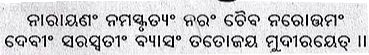

## Motivation

Before beginning writing, the authors of this book, like much of the workforce, had to become caffeinated. We hopped in the car and started driving. Using an iPhone, Alex called out “Hey Siri,” awakening the phone’s voice recognition system. Then Mu commanded, “Directions to Blue Bottle coffee shop.” The phone quickly displayed the transcription of his command. It also recognized that we were asking for directions and launched the Maps application (app) to fulfill our request. Once launched, the Maps app identified a number of routes. Next to each route, the phone displayed a predicted transit time.

While we fabricated this story for pedagogical convenience, it demonstrates that in the span of just a few seconds, our everyday interactions with a smartphone can engage several machine learning models. Imagine just writing a program to respond to a wake word such as “Alexa,” “OK Google,” or “Hey Siri.” Try coding it up in a room by yourself with nothing but a computer and a code editor. How would you write such a program from first principles? Think about it... the problem is hard.

Every second, the microphone will collect roughly 44,000 samples. Each sample is a measurement of the amplitude of the sound wave. What rule could map reliably from a snippet of raw audio to confident predictions `{yes, no}` on whether the snippet contains the wake word? If you are stuck, do not worry. We do not know how to write such a program from scratch either. That is why we use **machine learning**.

Here is the trick: often, even when we do not know how to tell a computer explicitly how to map from inputs to outputs, we are nonetheless capable of performing the cognitive feat. Machine learning allows us to bridge this gap by learning from data.

## Machine Learning Process

Even if you do not know how to program a computer to recognize the word “Alexa,” you are able to recognize it yourself. Armed with this ability, we can collect a huge dataset containing examples of audio snippets and associated labels, indicating which snippets contain the wake word. 

In the dominant approach to machine learning, we do not attempt to design a system explicitly to recognize wake words. Instead, we define a flexible program whose behavior is determined by a number of parameters. Then, we use the dataset to determine the best possible parameter values — those that improve the program's performance with respect to a chosen performance measure. You can think of the parameters as knobs that we can turn, manipulating the program’s behavior.

Once we fix the parameters, the program becomes a model. The set of all distinct programs (input-output mappings) that we can produce just by manipulating the parameters is called a **family of models**. The meta-program that uses our dataset to choose the parameters is known as a **learning algorithm**.

Before engaging the learning algorithm, we must define the problem precisely. This includes pinning down the exact nature of the inputs and outputs and choosing an appropriate model family. In this case, our model receives a snippet of audio as input and generates a selection among `{yes, no}` as output. If all goes well, the model should correctly predict whether the snippet contains the wake word. 

If we choose the right family of models, there should exist one configuration of the knobs such that the model fires “yes” every time it hears the word “Alexa.” Likewise, we expect that another configuration could be tuned to fire “yes” only upon hearing the word “Apricot.” Both tasks—recognizing “Alexa” and “Apricot”—are similar, so the same family of models can handle them. However, for fundamentally different tasks, like mapping from images to captions or from English to Chinese sentences, we might need a different family of models entirely.

If we were to set all of the knobs randomly, the model likely wouldn’t recognize "Alexa," "Apricot," or any other word. In machine learning, the process of **learning** is how we discover the right configuration of the knobs to produce the desired behavior. In other words, we train our model with data.

### Training Process
As depicted in Fig. 1, the typical steps for training a model are:

1. **Start with a randomly initialized model** that cannot perform useful tasks.
2. **Grab some data**, such as audio snippets and their corresponding `{yes, no}` labels.
3. **Adjust the parameters (knobs)** to make the model perform better, based on those examples.
    
 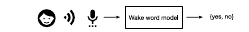
 
 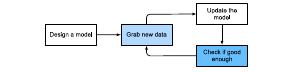
 Fig .1 . A typical training process.
 
 ## 1.2 Key Components

In our wake word example, we described a dataset consisting of audio snippets and binary labels. We provided a rough idea of how we might train a model to approximate a mapping from snippets to classifications. This type of problem, where we aim to predict an unknown label based on known inputs using a dataset of labeled examples, is called **supervised learning**. 

Supervised learning is just one of many types of machine learning problems. Before we dive into other varieties, it’s important to highlight some **core components** that will be present in any machine learning problem we tackle:

1. **The data** that we can learn from.
2. **A model** that transforms the data.
3. **An objective function** that quantifies how well (or poorly) the model is performing.
4. **An algorithm** to adjust the model’s parameters to optimize the objective function.


## 1.2.1 Data

It goes without saying that you cannot do data science without **data**. While we could spend hundreds of pages pondering the precise definition of data, for now, we will focus on the key properties of datasets that concern us.

Generally, we deal with a **collection of examples**. To work with data effectively, we typically need to represent it numerically. Each example (or data point, data instance, or sample) consists of a set of attributes called **features** (sometimes referred to as covariates or inputs), based on which the model makes predictions.

In **supervised learning** problems, the goal is to predict a special attribute called the **label** (or target), which is not part of the model’s input. For example:

- If we were working with image data, each example might consist of a photograph (the features) and a label indicating the category of the photograph. The photograph would be numerically represented as grids of values corresponding to the brightness of red, green, and blue light at each pixel location. A 200 × 200 color image would thus have 200 × 200 × 3 = 120,000 numerical values.
- For electronic health records, we might predict the likelihood of a patient's survival over the next 30 days based on features like age, vital signs, comorbidities, medications, and procedures. The label could be a binary value indicating survival.

When every example has the same number of numerical features, we say the inputs are **fixed-length vectors**, and the dimensionality is the constant length of these vectors. Fixed-length inputs are convenient but not always available. For instance:

- Images from the Internet might vary in resolution or shape, unlike standard equipment images.
- Text data can vary significantly in length (e.g., short vs. long customer reviews).

One of deep learning's major advantages is its ability to handle **varying-length data** gracefully.

### The Importance of Data Quality

Having more data makes it easier to train more powerful models. The shift from small data to **big data** has fueled much of deep learning's success. However, we must ensure that we have the **right data**. If the data is full of mistakes or the chosen features are irrelevant, the learning process will fail. The saying "garbage in, garbage out" holds true.

Poor data quality can have severe consequences, especially in sensitive applications like **predictive policing**, **resume screening**, or **lending risk models**. For example, if a skin cancer recognition system has never encountered black skin, it could fail when applied to diverse populations. Furthermore, historical biases in data could cause models to perpetuate societal injustices, such as in hiring decisions.

---

## 1.2.2 Models

Most machine learning tasks involve **transforming data**. For example, we might build a system that ingests photos and predicts whether someone is smiling or a system that ingests sensor readings and predicts anomalies. 

By **model**, we refer to the computational machinery for processing data of one type and producing predictions of a possibly different type. Machine learning models are typically **statistical models** that can be estimated from data.

While traditional models handle simple problems, **deep learning** focuses on more powerful models that perform successive transformations of data, hence the term "deep." These models address complex problems where classical methods may fall short. We'll discuss both **deep models** and more **traditional methods** in this book.

---

## 1.2.3 Objective Functions

In machine learning, **learning** means improving performance on a task over time. To determine whether an update to a model constitutes an improvement, we need a formal measure of performance called an **objective function** (or **loss function** when lower values are better).

For example:
- For **regression tasks**, the most common loss function is **squared error**, which is the square of the difference between the prediction and the true value.
- For **classification tasks**, the objective might be to minimize the **error rate**, i.e., the fraction of incorrect predictions.

Some objectives, like squared error, are easy to optimize, while others, like error rate, are more complex due to **non-differentiability** or other issues. In such cases, we often optimize a **surrogate objective**.

### Training vs. Testing

When optimizing a model, we minimize the loss on a **training dataset**. However, good performance on training data doesn’t guarantee generalization to new, unseen data. Therefore, we usually split the data into:
1. **Training set** – used for learning model parameters.
2. **Test set** – held out for evaluating performance on unseen data.

A model that performs well on the training set but fails on the test set is said to be **overfitting** to the training data.

---

## 1.2.4 Optimization Algorithms

Once we have data, a model, and a well-defined objective function, we need an **optimization algorithm** to adjust the model’s parameters to minimize the loss function.

The most popular optimization algorithm in deep learning is **gradient descent**. At each step, this algorithm checks how the training loss would change if each parameter is adjusted slightly. It then updates the parameters in the direction that reduces the loss.

---

## 1.3 Kinds of Machine Learning Problems

The wake word problem in our example is just one of many problems that machine learning can address. Below, we provide a broad overview of the main categories of machine learning problems to give us some common language throughout the book.

---

### 1.3.1 Supervised Learning

Supervised learning tasks involve a dataset with both features and labels. The goal is to produce a model that can predict the label given the input features.

### 1.3.1.1 Supervised Learning Process

A **feature-label pair** is called an **example**. Sometimes, when the context is clear, we may use the term **examples** to refer to a collection of inputs, even when the corresponding labels are unknown. The term **supervised learning** comes from the fact that during training, we (the supervisors) provide the model with a dataset consisting of **labeled examples**.

In **probabilistic terms**, supervised learning typically involves estimating the **conditional probability** of a label given the input features. Although it is only one of several paradigms in machine learning, supervised learning dominates successful applications in industry. This is largely due to the fact that many important tasks can be framed as **estimating the probability** of something unknown based on a particular set of data. Examples include:

- Predicting **cancer** vs. **not cancer**, given a computer tomography image.
- Predicting the correct **translation** in French, given a sentence in English.
- Predicting the **stock price** next month based on this month’s financial reporting data.

### Diverse Forms of Supervised Learning

While all supervised learning problems can be described as "predicting labels given input features," they take diverse forms and require numerous modeling decisions depending on factors such as:

- **Type** of input data (e.g., images, text, or numerical data).
- **Size** and **quantity** of inputs.
- Whether the input consists of **fixed-length vectors** or **arbitrary-length sequences**.

We'll explore various supervised learning problems in detail throughout this book.

### Learning Process

Informally, the **learning process** in supervised learning follows these steps:

1. **Collect a large dataset** of examples where the features are known.
2. **Select a random subset** of these examples, ensuring that you acquire the **ground-truth labels** for each example. Labels might already be available (e.g., "did the patient die within the year?") or may require **human annotation** (e.g., categorizing images).
3. Together, these inputs and labels make up the **training set**.
4. Feed the training set into a **supervised learning algorithm**, which is a function that takes as input the dataset and outputs another function: the **learned model**.
5. After training, the model can then be applied to **previously unseen inputs** to generate **predictions** of the corresponding labels.

The **full process** is depicted in **Figure 1.3.1**.

---
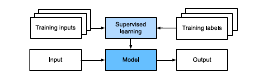
**Figure 1.3.1: Supervised Learning Process Overview**
### 1.3.2 Regression

Perhaps the simplest supervised learning task to understand is **regression**. Consider a set of data gathered from a database of home sales. Each **row** in a table might correspond to a different house, and each **column** might correspond to a relevant attribute (or feature), such as:

- **Square footage**
- **Number of bedrooms**
- **Number of bathrooms**
- **Walking distance** to the town center

For example, in cities like New York or San Francisco, if you're not a CEO, your feature vector for home attributes might look something like `[600, 1, 1, 60]`. On the other hand, if you live in Pittsburgh, it could be more like `[3000, 4, 3, 10]`. In regression tasks, the feature vector represents a **fixed-length vector** for each house, which is essential for many classic machine learning algorithms.

The distinguishing factor in regression is the nature of the **target** (label). For instance, if you're trying to **estimate the market value of a house** given its features, the target is a **numerical value**, which makes this a **regression problem**. The goal is to create a model whose predictions closely match the observed values (labels).

#### Examples of Regression Problems

- Predicting the **rating** a user will assign to a movie
- Predicting the **length of stay** for hospital patients
- Estimating **surgery duration** or **future rainfall** 

A rule of thumb is that any **how much?** or **how many?** question suggests regression. These tasks can be tackled with models that minimize the **squared error loss function**, which assumes that the data may have been affected by Gaussian noise.

### 1.3.3 Classification

While regression focuses on predicting numerical values, **classification** addresses **which one?** problems. For example, consider a bank developing a **check-scanning feature** for its mobile app. After isolating each handwritten character from the image of the check, the task is to **determine which character** is represented in each patch of the image.

In classification tasks, we aim to predict the **category** (or class) to which an example belongs. For instance, if the goal is to classify handwritten digits, there might be **ten possible classes** corresponding to digits 0 through 9. The simplest classification problem is **binary classification**, where there are only **two possible classes**, such as predicting whether an image contains a **cat** or a **dog**.

#### Examples of Classification Problems

- Predicting **cat vs. dog** from images
- Classifying **handwritten characters** (e.g., {0, 1, 2, ..., 9, a, b, c, ...})

In classification, rather than predicting a numerical value (as in regression), we predict the **class assignment**. To make this task more manageable, we often express the model’s output as a set of **probabilities** across all possible classes. For example, a classifier might assign a 90% probability that an image contains a cat.

#### Multiclass Classification

When there are more than two possible classes, we refer to it as a **multiclass classification** problem. A common example includes **handwritten character recognition** for digits and letters.

In classification problems, the **cross-entropy loss function** is commonly used. It provides a way to evaluate how well the predicted probability distribution matches the actual labels. We'll explore **information theory** and cross-entropy in more detail in later chapters.

---

**Fig.3: An example of a mushroom image used for classification.**
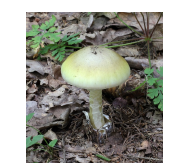
Fig 3. Is it an Umnbrella or a Hat?



### 1.3.4 Hierarchical Classification

While **binary** and **multiclass classification** are common, some tasks require more nuanced approaches, such as **hierarchical classification**. In hierarchical classification, the classes are structured in a hierarchy, and **not all errors are equal**. For example, it might be less harmful to misclassify a **poodle** as a **schnauzer** than to classify it as a **dinosaur**.

In some domains, the relevant hierarchy is determined by how the model will be used. For instance:

- Misclassifying a **rattlesnake** as a **garter snake** could have **deadly consequences**, even though they are close phylogenetically.
- In contrast, the same mistake might be harmless in a taxonomy-based classification without real-world implications.

This concept is crucial when designing models for fields such as **biology** or **medicine**, where the cost of misclassification varies based on the **relationship between classes**.

### 1.3.5 Decision Theory in Classification

When making decisions based on classification models, it's essential to consider the **disutility** associated with each potential action. For example, consider the case of a **mushroom classifier**:

- Assume we built a classifier to predict whether a mushroom is poisonous. If it outputs a **0.2 probability** that the mushroom is a **death cap** and an **0.8 probability** that it is safe to eat, the decision is not straightforward.
- The risk associated with eating a poisonous mushroom (a **death cap**) is far greater than the benefit of consuming it for dinner.

To make the decision, we calculate the **expected disutility**:

- **Eating the mushroom**:
  - Disutility = `0.2 × ∞ + 0.8 × 0 = ∞` (due to the chance of death)
- **Discarding the mushroom**:
  - Disutility = `0.2 × 0 + 0.8 × 1 = 0.8` (mild loss from not eating)

Clearly, the safer choice is to **discard the mushroom**, as any mycologist would recommend, given the potential dangers of a **death cap**.

### 1.3.6 Tagging

Sometimes classification problems don’t fit neatly into the **binary** or **multiclass** setups. For example, consider a scenario where multiple labels can apply simultaneously, such as an image that contains **multiple objects**. This problem is known as **tagging**.

#### Example: The Town Musicians of Bremen

The fairy tale *The Town Musicians of Bremen* features four animals—**a cat, a rooster, a dog, and a donkey**—standing on top of each other (as depicted in Fig. 1.3.3). Suppose we are asked to classify this image:

- A traditional binary classifier trained to distinguish **cats** from **dogs** would struggle with this image, as it contains multiple animals.
- A more sophisticated tagging model could label the image with **multiple categories**, identifying each animal: cat, dog, rooster, and donkey.

This type of problem arises often in **object detection**, **image recognition**, and **natural language processing** tasks where multiple **labels** or **tags** are necessary to fully describe an example.


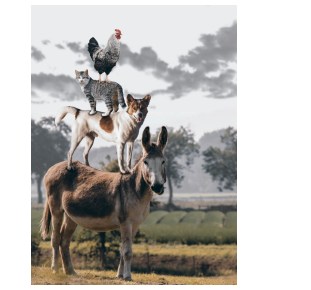
Fig. 4. A donkey, a dog, a cat, and a rooster.

### Recommender Systems and Search

In the field of **information retrieval**, we often impose rankings over sets of items. For example, take web search—the goal is less about determining whether a particular page is relevant for a query, but rather, which among the relevant results should be shown most prominently. One possible solution might be to first assign a score to every element in the set and retrieve the top-rated elements.

For example, **PageRank** is a scoring system initially used by Google, where the relevance of a page was determined by how many other pages linked to it, providing a measure of authority. Peculiarly, this scoring did not depend on the actual query. Nowadays, machine learning and behavioral models are used to obtain **query-dependent** relevance scores.

### Recommender Systems

Recommender systems are similar to search, but they focus more on **personalization**. For instance, recommendations for a science fiction fan will differ significantly from those for a Peter Sellers comedy fan. Systems can use **explicit feedback** such as ratings or **implicit feedback**, like skipping songs in a playlist.

In the simplest terms, recommender systems estimate a score $ \hat{r}_{ui} $ for a user $ u $ and an item $ i $, with the goal of maximizing user satisfaction:

$$ \hat{r}_{ui} = f(u, i) $$

where $ f(u, i) $ is the learned function predicting user $ u $'s interaction with item $ i $.

#### Collaborative Filtering

Collaborative filtering methods use either **user-based** or **item-based** techniques:

1. **User-based Collaborative Filtering**: Find users similar to the target user and recommend items they have liked.
   
$$ \hat{r}_{ui} = \frac{\sum_{v \in \text{Users}} \text{sim}(u, v) \cdot r_{vi}}{\sum_{v \in \text{Users}} \text{sim}(u, v)} $$

2. **Item-based Collaborative Filtering**: Find items similar to the ones a user has interacted with and recommend them.

$$ \hat{r}_{ui} = \frac{\sum_{j \in \text{Items}} \text{sim}(i, j) \cdot r_{uj}}{\sum_{j \in \text{Items}} \text{sim}(i, j)} $$

#### Ranking and Scoring

In recommender systems and search, **ranking algorithms** prioritize results. These algorithms aim to maximize relevance, diversity, novelty, and serendipity. In modern systems, **deep learning** is widely used to improve these rankings.

For instance, the recommendation score could be defined as:

$$ \hat{y} = \text{softmax}(W_x^T x + b_x) $$

where $ W_x $ is the weight matrix, $ x $ the input features, and $ b_x $ the bias term. This neural network model predicts the probability distribution of items to recommend based on the input features.

### Limitations of Recommender Systems

Recommender systems face several limitations:

- **Selection Bias**: Users rate items they feel strongly about, leading to a bias in the training data.
  
- **Cold Start Problem**: New users or new items lack interaction data, making recommendations difficult.

- **Censored Feedback**: Implicit feedback (e.g., skipping a song) is abundant but ambiguous. For example, skipping a song may not indicate dissatisfaction but rather context-inappropriateness.

### Conclusion

Recommender systems have advanced significantly with the adoption of **machine learning** and **deep learning**, but challenges like bias, cold-start, and personalization remain active areas of research.


### Sequence Learning

So far, we have looked at problems where we have some fixed number of inputs and produce a fixed number of outputs. For example, we considered predicting house prices given a fixed set of features: square footage, number of bedrooms, number of bathrooms, and the transit time to downtown. We also discussed mapping from an image (of fixed dimension) to the predicted probabilities that it belongs to each among a fixed number of classes and predicting star ratings associated with purchases based on the user ID and product ID alone. 

In these cases, once our model is trained, after each test example is fed into our model, it is immediately forgotten. We assumed that successive observations were independent and thus there was no need to hold on to this context. But how should we deal with video snippets? In this case, each snippet might consist of a different number of frames. Our guess of what is going on in each frame might be much stronger if we take into account the previous or succeeding frames. 

The same goes for language. One popular deep learning problem is **machine translation**: the task of ingesting sentences in some source language and predicting their translations in another language. These problems also occur in medicine. We might want a model to monitor patients in the intensive care unit and to fire off alerts whenever their risk of dying in the next 24 hours exceeds some threshold. Here, we would not throw away everything that we know about the patient history every hour, making predictions based only on the most recent measurements.

These problems are among the most exciting applications of machine learning and they are instances of **sequence learning**. They require a model to either ingest sequences of inputs or to emit sequences of outputs (or both). Specifically, **sequence-to-sequence learning** considers problems where inputs and outputs both consist of variable-length sequences. Examples include machine translation and speech-to-text transcription.

#### Special Cases of Sequence Learning

1. **Tagging and Parsing**: This involves annotating a text sequence with attributes. Here, the inputs and outputs are aligned, i.e., they are of the same number and occur in a corresponding order. For instance, in **part-of-speech (PoS) tagging**, we annotate every word in a sentence with the corresponding part of speech, i.e., “noun” or “direct object”. Alternatively, we might want to know which groups of contiguous words refer to named entities, like people, places, or organizations. In a cartoonishly simple example below, we might just want to indicate, for every word in a sentence, whether it is part of a named entity (tagged as “Ent”).

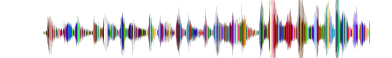
Fig.4 -D-e-e-p- L-ea-r-ni-ng- in an audio recording.
### Text to Speech

This is the inverse of automatic speech recognition. Here, the input is text and the output is an audio file. In this case, the output is much longer than the input.

### Machine Translation

Unlike the case of speech recognition, where corresponding inputs and outputs occur in the same order, in machine translation, unaligned data poses a new challenge. Here, the input and output sequences can have different lengths, and the corresponding regions of the respective sequences may appear in different orders. 

Consider the following illustrative example of the peculiar tendency of Germans to place the verbs at the end of sentences:

- **German**: Haben Sie sich schon dieses großartige Lehrwerk angeschaut?  
- **English**: Did you already check out this excellent tutorial?  
- **Wrong alignment**: Did you yourself already this excellent tutorial looked-at?

Many related problems pop up in other learning tasks. For instance, determining the order in which a user reads a webpage is a two-dimensional layout analysis problem. Dialogue problems exhibit all kinds of additional complications, where determining what to say next requires taking into account real-world knowledge and the prior state of the conversation across long temporal distances. These are active areas of research.

### 1.3.2 Unsupervised and Self-Supervised Learning

The previous examples focused on **supervised learning**, where we feed the model a giant dataset containing both the features and corresponding label values. You could think of the supervised learner as having an extremely specialized job and an extremely dictatorial boss. The boss stands over its shoulder and tells it exactly what to do in every situation until it learns to map from situations to actions. Working for such a boss sounds pretty lame. On the other hand, pleasing such a boss is pretty easy. You just recognize the pattern as quickly as possible and imitate their actions.

Considering the opposite situation, it could be frustrating to work for a boss who has no idea what they want you to do. However, if you plan to be a data scientist, you had better get used to it. The boss might just hand you a giant dump of data and tell you to do some data science with it! This sounds vague because it is. We call this class of problems **unsupervised learning**, and the type and number of questions we could ask is limited only by our creativity. 

We will address unsupervised learning techniques in later chapters. To whet your appetite for now, we describe a few of the following questions you might ask:

- **Can we find a small number of prototypes that accurately summarize the data?** Given a set of photos, can we group them into landscape photos, pictures of dogs, babies, cats, and mountain peaks? Likewise, given a collection of users’ browsing activities, can we group them into users with similar behavior? This problem is typically known as **clustering**.

- **Can we find a small number of parameters that accurately capture the relevant properties of the data?** The trajectories of a ball are well described by velocity, diameter, and mass of the ball. Tailors have developed a small number of parameters that describe human body shape fairly accurately for the purpose of fitting clothes. These problems are referred to as **subspace estimation**. If the dependence is linear, it is called **principal component analysis**.


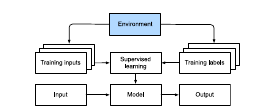

Fig 5. Collecting data for supervised learning from an environment.

# Intelligent Agents and Reinforcement Learning

When considering intelligent agents, we must shift our focus from merely making predictions to taking actions that impact the environment. This perspective leads us to several important considerations:

1. **Choosing Actions**: Unlike predictions, actions actually affect the environment. Thus, training an intelligent agent requires an understanding of how its actions influence future observations.

2. **Modeling Questions**: The interaction between an agent and its environment introduces a variety of modeling questions, such as:
   - Does the environment remember past actions?
   - Does the environment aim to assist us, as in the case of a user reading text into a speech recognizer?
   - Does the environment attempt to outsmart us, like spammers modifying their emails to bypass filters?
   - Do the dynamics of the environment change over time? For example, do future data patterns resemble past patterns, or do they shift in response to the agent's actions?

These considerations lead to the **problem of distribution shift**, where training and test data are not aligned. Many individuals have encountered this challenge, for instance, when taking exams crafted by a lecturer whose homework was designed by teaching assistants.

## Reinforcement Learning

To effectively develop an agent that interacts with an environment and makes decisions, one will likely explore **reinforcement learning (RL)**. This framework is especially relevant in areas such as:

- Robotics
- Dialogue systems
- Artificial intelligence (AI) in video games

Deep reinforcement learning, which integrates deep learning techniques with RL, has gained significant traction. Notable successes include:
- The **Deep Q-Network** (DQN) that defeated human players in Atari games using only visual inputs (Mnih et al., 2015).
- The **AlphaGo** program that triumphed over the world champion in the board game Go (Silver et al., 2016).

By understanding these concepts, we can better design intelligent agents capable of navigating complex environments and making informed decisions.

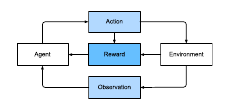

Fig 6. The interaction between reinforcement learning and an environment.

# Generality of the Reinforcement Learning Framework

The generality of the reinforcement learning (RL) framework is profound. For instance, we can reinterpret supervised learning problems as reinforcement learning problems. 

## Supervised Learning as Reinforcement Learning

Consider a classification problem. We can define an RL agent where each action corresponds to a class. The environment can then be structured to provide a reward equal to the loss function from the original supervised learning problem.

### Key Differences from Supervised Learning

While reinforcement learning can emulate supervised learning, it also addresses many challenges that supervised learning cannot. In supervised learning, we always assume that each training input is associated with the correct label. However, in reinforcement learning, we do not assume that the environment provides the optimal action for each observation. 

Instead, we typically only receive a reward, and the environment may not even indicate which actions led to that reward.

## The Credit Assignment Problem

Consider the game of chess as an example. The only reward signal is obtained at the end of the game: a win yields a reward of \(+1\), while a loss results in a reward of \(-1\). This situation presents the **credit assignment problem**, which involves determining which actions deserve credit or blame for the outcome.

Similarly, think of an employee receiving a promotion on October 11. This promotion likely reflects many well-chosen actions over the preceding year. To earn future promotions, the employee must identify which actions contributed to the previous promotion.

## Partial Observability

Reinforcement learners may also face **partial observability**, where the current observation does not provide complete information about the state. For instance, a cleaning robot might find itself trapped in one of many identical closets in a house. To accurately infer its precise location, the robot may need to consider previous observations before entering the closet.

## Exploration vs. Exploitation

At any point, a reinforcement learner may have knowledge of a good policy, but there could be better policies that the agent has never tried. The learner must continually decide whether to exploit the currently known best strategy or to explore the strategy space, potentially sacrificing some short-term rewards for long-term knowledge.

## General Reinforcement Learning Problem

The general RL problem encompasses the following aspects:
- Actions affect subsequent observations.
- Rewards are only observed corresponding to the chosen actions.
- The environment can be either fully or partially observed.

Given this complexity, addressing all these elements simultaneously may pose a significant challenge for researchers. Moreover, not all practical problems exhibit this level of complexity, leading to the study of various special cases of reinforcement learning problems.

### Special Cases of Reinforcement Learning Problems

- **Markov Decision Process (MDP)**: When the environment is fully observed, we refer to the RL problem as an MDP.
- **Contextual Bandit Problem**: This problem arises when the state does not depend on previous actions.
- **Multi-Armed Bandit Problem**: In this classic scenario, there is no state; only a set of available actions with initially unknown rewards.

By exploring these special cases, researchers can better understand and tackle specific RL challenges.

# 1.4 Roots

In this section, we will explore the foundational roots of machine learning and its connection to deep learning, which provides powerful tools for solving a diverse set of problems. Although many deep learning methods are relatively recent inventions, the core ideas behind learning from data have been studied for centuries. 

## Historical Context

Humans have long desired to analyze data and predict future outcomes, a pursuit that has significantly influenced the development of natural sciences. 

- The **Bernoulli distribution** is named after Jacob Bernoulli (1655–1705).
- The **Gaussian distribution** was discovered by Carl Friedrich Gauss (1777–1855). 

Gauss, for instance, invented the least mean squares algorithm, which remains in use today for numerous applications ranging from insurance calculations to medical diagnostics. These mathematical tools contributed to an experimental approach in the natural sciences. 

For example, Ohm’s law, which relates current and voltage in a resistor, is perfectly described by a linear model. 

## Early Statistical Intuition

Even in the Middle Ages, mathematicians exhibited a keen intuition for estimation. One notable example involves Jacob Köbel (1460–1533) and his geometry book, which illustrates a method for estimating the average foot length in a population.

- **Example of Estimation**: A group of individuals exited a church, where 16 adult men were asked to line up and have their feet measured. The sum of these measurements was then divided by 16 to obtain an estimate for the average foot length, known today as one foot.

To improve this method, Köbel implemented an adjustment for misshapen feet: the two men with the shortest and longest feet were excluded from the average, calculating it only over the remainder. This method is among the earliest examples of a **trimmed mean estimate**.

## The Rise of Statistics

Statistics began to flourish with the collection and availability of data. One of its pioneers, [to be continued with specific names or contributions].

By understanding these historical roots, we gain insight into the evolution of data analysis and its implications for modern machine learning and deep learning techniques.


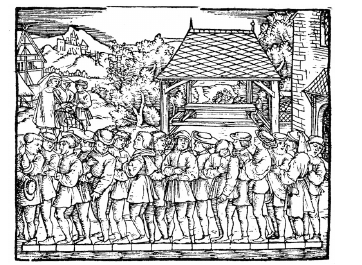
Fig. 6. Estimating the length of a root.

## Contributions to Statistics and Machine Learning

### Ronald Fisher (1890–1962)

Ronald Fisher made significant contributions to both the theory and applications of statistics, particularly in genetics. Many of his algorithms, such as **linear discriminant analysis**, and formulas, such as the **Fisher information matrix**, remain foundational in modern statistics. Fisher's data resources also had a lasting impact; the **Iris dataset** he released in 1936 is still frequently used to demonstrate machine learning algorithms. 

However, it's important to acknowledge that Fisher was also a proponent of **eugenics**, highlighting the morally questionable uses of data science that have existed alongside its beneficial applications in industry and the natural sciences.

### Influences from Information Theory and Computation

A second significant influence on machine learning emerged from **information theory**, pioneered by **Claude Shannon (1916–2001)**, and the theory of computation, notably through **Alan Turing (1912–1954)**. Turing raised the question, “Can machines think?” in his seminal paper *Computing Machinery and Intelligence* (Turing, 1950). He proposed the **Turing test**, where a machine can be considered intelligent if it is difficult for a human evaluator to distinguish between the responses of a machine and a human during textual interactions.

### Insights from Neuroscience and Psychology

Neuroscience and psychology have also informed machine learning development. Scholars have sought to explain and reverse engineer human intelligence. One of the earliest biologically inspired algorithms was introduced by **Donald Hebb (1904–1985)** in his influential book *The Organization of Behavior* (Hebb and Hebb, 1949). Hebb posited that neurons learn through positive reinforcement, leading to the **Hebbian learning rule**. This concept inspired subsequent works, such as Rosenblatt’s **perceptron learning algorithm**, and laid the groundwork for many stochastic gradient descent algorithms that support modern deep learning, promoting desirable behaviors while diminishing undesirable ones to optimize neural network parameters.

### The Evolution of Neural Networks

The term **neural networks** derives from biological inspiration, as researchers have attempted to construct computational circuits that mimic networks of interacting neurons since the models of **Alexander Bain (1873)** and **James Sherrington (1890)**. Although the interpretation of biological processes has become less literal over time, the name persists. Key principles found in most networks today include:

- The alternation of linear and nonlinear processing units, commonly referred to as **layers**.
- The application of the **chain rule** (also known as **backpropagation**) for adjusting parameters throughout the entire network simultaneously.

### Research Challenges and Resurgence

Following an initial period of rapid advancement, research in neural networks stagnated from around 1995 until 2005 due to two primary challenges:

1. **Computational Expense**: Training a network is computationally demanding. While random-access memory was abundant at the end of the 20th century, computational power was limited.
2. **Small Datasets**: Datasets were relatively small; for example, Fisher’s Iris dataset from 1932 was commonly used to evaluate algorithm efficacy, and the **MNIST dataset**, with its 60,000 handwritten digits, was considered large.

Given the limited data and computational resources, strong statistical tools like **kernel methods**, **decision trees**, and **graphical models** often outperformed neural networks in various applications. These methods also had the advantage of requiring less time to train, offering more predictable results with robust theoretical guarantees.

## Contributions to Statistics and Machine Learning

### Ronald Fisher (1890–1962)

Ronald Fisher made significant contributions to both the theory and applications of statistics, particularly in genetics. Many of his algorithms, such as **linear discriminant analysis**, and formulas, such as the **Fisher information matrix**, remain foundational in modern statistics. Fisher's data resources also had a lasting impact; the **Iris dataset** he released in 1936 is still frequently used to demonstrate machine learning algorithms. 

However, it's important to acknowledge that Fisher was also a proponent of **eugenics**, highlighting the morally questionable uses of data science that have existed alongside its beneficial applications in industry and the natural sciences.

### Influences from Information Theory and Computation

A second significant influence on machine learning emerged from **information theory**, pioneered by **Claude Shannon (1916–2001)**, and the theory of computation, notably through **Alan Turing (1912–1954)**. Turing raised the question, “Can machines think?” in his seminal paper *Computing Machinery and Intelligence* (Turing, 1950). He proposed the **Turing test**, where a machine can be considered intelligent if it is difficult for a human evaluator to distinguish between the responses of a machine and a human during textual interactions.

### Insights from Neuroscience and Psychology

Neuroscience and psychology have also informed machine learning development. Scholars have sought to explain and reverse engineer human intelligence. One of the earliest biologically inspired algorithms was introduced by **Donald Hebb (1904–1985)** in his influential book *The Organization of Behavior* (Hebb and Hebb, 1949). Hebb posited that neurons learn through positive reinforcement, leading to the **Hebbian learning rule**. This concept inspired subsequent works, such as Rosenblatt’s **perceptron learning algorithm**, and laid the groundwork for many stochastic gradient descent algorithms that support modern deep learning, promoting desirable behaviors while diminishing undesirable ones to optimize neural network parameters.

### The Evolution of Neural Networks

The term **neural networks** derives from biological inspiration, as researchers have attempted to construct computational circuits that mimic networks of interacting neurons since the models of **Alexander Bain (1873)** and **James Sherrington (1890)**. Although the interpretation of biological processes has become less literal over time, the name persists. Key principles found in most networks today include:

- The alternation of linear and nonlinear processing units, commonly referred to as **layers**.
- The application of the **chain rule** (also known as **backpropagation**) for adjusting parameters throughout the entire network simultaneously.

### Research Challenges and Resurgence

Following an initial period of rapid advancement, research in neural networks stagnated from around 1995 until 2005 due to two primary challenges:

1. **Computational Expense**: Training a network is computationally demanding. While random-access memory was abundant at the end of the 20th century, computational power was limited.
2. **Small Datasets**: Datasets were relatively small; for example, Fisher’s Iris dataset from 1932 was commonly used to evaluate algorithm efficacy, and the **MNIST dataset**, with its 60,000 handwritten digits, was considered large.

Given the limited data and computational resources, strong statistical tools like **kernel methods**, **decision trees**, and **graphical models** often outperformed neural networks in various applications. These methods also had the advantage of requiring less time to train, offering more predictable results with robust theoretical guarantees.

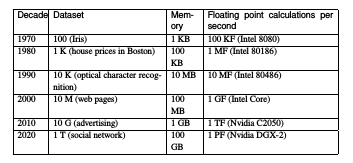
# 1.5 The Road to Deep Learning

The landscape of machine learning and deep learning has transformed significantly with the emergence of large datasets and advancements in technology. Key factors contributing to this transformation include:

- The **World Wide Web**, which has facilitated the collection of vast amounts of data.
- The rise of companies serving hundreds of millions of users online, leading to an increased demand for data-driven solutions.
- The proliferation of cheap, high-quality sensors that generate extensive data streams.
- Affordable data storage options, often referred to as **Kryder’s Law**, which states that the storage capacity of hard drives is increasing at an exponential rate.
- The growth of affordable computational power, commonly associated with **Moore’s Law**, which posits that the number of transistors on a microchip doubles approximately every two years, leading to increased performance.

## Impact of GPU Advancements

A significant revolution in the computational landscape of deep learning was driven by advances in **Graphics Processing Units (GPUs)**, originally designed for computer gaming. This development enabled algorithms and models that were once computationally infeasible to become relevant and applicable.

### Table 1.5.1: Dataset Size vs. Computer Memory and Computational Power

| Dataset Size         | Computer Memory (GB) | Computational Power (FLOPS) |
|----------------------|-----------------------|------------------------------|
| Small (e.g., MNIST)  | ~1                    | ~10^9 (1 billion)            |
| Medium (e.g., CIFAR-10) | ~10                 | ~10^10 (10 billion)          |
| Large (e.g., ImageNet) | ~150                | ~10^11 (100 billion)         |
| Very Large (e.g., OpenAI datasets) | ~1,000+   | > ~10^12 (trillion)          |

This table illustrates the correlation between the size of datasets and the required computer memory and computational power. As datasets have grown larger, the need for enhanced computational resources has become increasingly evident.

By harnessing these advancements, deep learning has achieved unprecedented levels of performance across a variety of applications, marking a significant milestone in the field of artificial intelligence.


# 1.5 The Road to Deep Learning (Continued)

Note that random-access memory has not kept pace with the growth in data. At the same time, increases in computational power have outpaced the growth in datasets. This means that statistical models need to become more memory efficient and can spend more computational cycles optimizing parameters due to the increased compute budget. Consequently, the sweet spot in machine learning and statistics moved from generalized linear models and kernel methods to deep neural networks.

This shift is also one reason why many foundational methods in deep learning, such as:

- **Multilayer Perceptrons** (McCulloch and Pitts, 1943)
- **Convolutional Neural Networks** (LeCun et al., 1998)
- **Long Short-Term Memory** (Hochreiter and Schmidhuber, 1997)
- **Q-Learning** (Watkins and Dayan, 1992)

were essentially "rediscovered" in the past decade after laying dormant for considerable time. The recent progress in statistical models, applications, and algorithms has sometimes been likened to the **Cambrian explosion**: a moment of rapid progress in the evolution of species.

## Key Innovations

The following innovations have contributed to tremendous progress over the past decade:

- **Capacity Control**: Novel methods such as dropout (Srivastava et al., 2014) mitigate overfitting by injecting noise (Bishop, 1995) throughout the neural network during training.

- **Attention Mechanisms**: These solve the challenge of increasing memory and complexity without expanding the number of learnable parameters, utilizing a learnable pointer structure (Bahdanau et al., 2014).

- **Transformer Architecture**: Built solely on attention mechanisms, the Transformer (Vaswani et al., 2017) demonstrates superior scaling behavior, excelling across natural language processing (Brown et al., 2020; Devlin et al., 2018), computer vision (Dosovitskiy et al., 2021; Liu et al., 2021), and more.

- **Language Models**: These models predict text sequences based on other text, with advancements allowing for human-like text generation (Brown et al., 2020; Chowdhery et al., 2022).

- **Multi-Stage Designs**: Methods such as memory networks (Sukhbaatar et al., 2015) and the neural programmer-interpreter (Reed and De Freitas, 2015) enable iterative reasoning similar to how processors modify memory.

- **Generative Adversarial Networks (GANs)**: Introduced by Goodfellow et al. (2014), GANs replaced traditional sampling methods with flexible, parameterized algorithms, significantly advancing generative modeling.

- **Diffusion Models**: These models, which gradually add noise and learn denoising processes (Ho et al., 2020; Sohl-Dickstein et al., 2015), are increasingly replacing GANs in deep generative modeling.

- **Parallel and Distributed Training**: Significant improvements in training algorithms allow for processing large datasets across multiple GPUs. Training times for models like ResNet-50 on ImageNet have drastically decreased, showcasing the power of distributed computing.

Deep learning frameworks have played a crucial role in disseminating ideas. The first generation of open-source frameworks included **Caffe**, **Torch**, and **Theano**, now succeeded by **TensorFlow** (often via Keras), **CNTK**, and **Apache MXNet**. The emergence of imperative tools like **PyTorch** and **JAX** has further simplified model building.

The division of labor between system researchers creating better tools and statistical modelers developing more effective neural networks has made the field more accessible. For example, training a logistic regression model, once a complex task, can now be accomplished in less than 10 lines of code, democratizing access to machine learning.


# 1.6 Success Stories

AI has a long history of delivering results that would be difficult to accomplish otherwise. For instance, mail sorting systems using optical character recognition have been deployed since the 1990s, which is the source of the famous MNIST dataset of handwritten digits. Similar technologies apply to:

- **Reading Checks**: Used for bank deposits.
- **Scoring Creditworthiness**: Automated checks for fraud are a backbone of many e-commerce payment systems like PayPal, Stripe, AliPay, WeChat, Apple, Visa, and MasterCard.

Machine learning plays a vital role in:

- **Search, Recommendation, Personalization, and Ranking**: These systems are pervasive but often hidden from sight. Recently, AI has gained attention due to solutions to previously intractable problems related directly to consumers, many of which can be attributed to deep learning.

## Key Developments in AI

- **Intelligent Assistants**: Digital assistants like Apple’s Siri, Amazon’s Alexa, and Google Assistant can answer spoken questions with increasing accuracy. They perform tasks from turning on light switches to arranging appointments.

- **Speech Recognition**: Systems have reached human parity for specific applications (Xiong et al., 2018).

- **Object Recognition**: Significant advancements have occurred, reducing the top-5 error rate on the ImageNet benchmark from 28% in 2010 (Lin et al., 2010) to 2.25% in 2017 (Hu et al., 2018).

- **Games as a Benchmark for AI**: 
  - TD-Gammon utilized temporal difference reinforcement learning for backgammon.
  - **DeepBlue** defeated Garry Kasparov in chess (Campbell et al., 2002) using massive parallelism.
  - **AlphaGo** achieved human parity in Go (Silver et al., 2016).
  - **Libratus** excelled in Poker with efficient strategies (Brown and Sandholm, 2017).

- **Self-Driving Cars**: Companies like Tesla, NVIDIA, and Waymo have made excellent progress toward partial autonomy, with deep learning primarily handling computer vision aspects.

Machine learning is becoming a ubiquitous tool across various fields, including robotics, logistics, computational biology, particle physics, and astronomy.

## Ethical Considerations

Concerns about an AI apocalypse and the plausibility of singularity often dominate discussions about AI. While AI systems can impact livelihoods—like creditworthiness assessments, vehicle navigation, and judicial decisions—they are far from sentient. 

1. **Current AI Limitations**: AI systems are designed and trained for specific goals and often combine rules, heuristics, and statistical models that mimic general intelligence.

2. **Automation of Menial Tasks**: Jobs in trucking and retail could face significant automation, which may have profound consequences for many workers.

3. **Bias in AI Models**: If applied without care, statistical models can lead to racial, gender, or age bias, raising concerns about procedural fairness.

In conclusion, ensuring the careful use of AI algorithms is crucial, as the immediate implications of automation and bias are more pressing than fears of malevolent superintelligence.

# 1.7 The Essence of Deep Learning

Thus far, we have discussed machine learning broadly. Deep learning is the subset of machine learning concerned with models based on many-layered neural networks. It is "deep" in the sense that its models learn multiple layers of transformations. Although this might seem narrow, deep learning has resulted in a dizzying array of models, techniques, problem formulations, and applications.

## Key Aspects of Deep Learning

### 1. Jointly Learned Representations
- Deep learning differentiates itself by jointly learning the operations at each layer of representation from the data. 
- This capability allows deep learning to excel in problems such as:
  - Learning from raw audio signals.
  - Processing raw pixel values of images.
  - Mapping between sentences of arbitrary lengths and their counterparts in foreign languages.

### 2. End-to-End Training
- One of the most significant commonalities in deep learning methods is end-to-end training.
- In contrast to traditional methods that separate feature engineering from model building (e.g., using Canny edge detector and SIFT feature extractor), deep learning replaces these manually engineered feature extractors with automatically tuned filters, yielding superior accuracy.
- This process eliminates the labor-intensive feature engineering and allows for a unified approach across various domains like computer vision, speech recognition, and natural language processing.

### 3. Transition to Nonparametric Models
- There is a shift from parametric statistical descriptions to fully nonparametric models, particularly when data is abundant.
- This transition allows for better-fitting models that reflect the underlying data structure.
- It mirrors progress in physics, where numerical simulations have replaced parametric approximations for complex systems.

### 4. Acceptance of Suboptimal Solutions
- Deep learning embraces suboptimal solutions and effectively deals with nonconvex nonlinear optimization problems.
- The deep learning community exhibits a newfound empiricism in addressing statistical challenges, leading to rapid advancements in practical algorithms.

### 5. Collaborative Tools and Resources
- The deep learning community values sharing tools across academic and corporate boundaries, contributing numerous libraries, statistical models, and trained networks as open-source resources.
- This spirit of collaboration is reflected in the freely available notebooks forming this book, aimed at lowering the barriers to access and promoting learning about deep learning.

In conclusion, deep learning has transformed how we approach complex problems, allowing for innovative solutions and fostering collaboration within the community.
# 1.7 The Essence of Deep Learning

Thus far, we have discussed machine learning broadly. Deep learning is the subset of machine learning concerned with models based on many-layered neural networks. It is "deep" in the sense that its models learn multiple layers of transformations. Although this might seem narrow, deep learning has resulted in a dizzying array of models, techniques, problem formulations, and applications.

## Key Aspects of Deep Learning

### 1. Jointly Learned Representations
- Deep learning differentiates itself by jointly learning the operations at each layer of representation from the data. 
- This capability allows deep learning to excel in problems such as:
  - Learning from raw audio signals.
  - Processing raw pixel values of images.
  - Mapping between sentences of arbitrary lengths and their counterparts in foreign languages.

### 2. End-to-End Training
- One of the most significant commonalities in deep learning methods is end-to-end training.
- In contrast to traditional methods that separate feature engineering from model building (e.g., using Canny edge detector and SIFT feature extractor), deep learning replaces these manually engineered feature extractors with automatically tuned filters, yielding superior accuracy.
- This process eliminates the labor-intensive feature engineering and allows for a unified approach across various domains like computer vision, speech recognition, and natural language processing.

### 3. Transition to Nonparametric Models
- There is a shift from parametric statistical descriptions to fully nonparametric models, particularly when data is abundant.
- This transition allows for better-fitting models that reflect the underlying data structure.
- It mirrors progress in physics, where numerical simulations have replaced parametric approximations for complex systems.

### 4. Acceptance of Suboptimal Solutions
- Deep learning embraces suboptimal solutions and effectively deals with nonconvex nonlinear optimization problems.
- The deep learning community exhibits a newfound empiricism in addressing statistical challenges, leading to rapid advancements in practical algorithms.

### 5. Collaborative Tools and Resources
- The deep learning community values sharing tools across academic and corporate boundaries, contributing numerous libraries, statistical models, and trained networks as open-source resources.
- This spirit of collaboration is reflected in the freely available notebooks forming this book, aimed at lowering the barriers to access and promoting learning about deep learning.

In conclusion, deep learning has transformed how we approach complex problems, allowing for innovative solutions and fostering collaboration within the community.





# 1.8 Summary

Machine learning studies how computer systems can leverage experience (often in the form of data) to improve performance on specific tasks. It combines ideas from statistics, data mining, and optimization and is often employed as a means of implementing AI solutions.

## Key Points

1. **Representational Learning**
   - A class of machine learning focused on automatically discovering the appropriate way to represent data.
   - Multi-level representation learning, exemplified by deep learning, involves learning many layers of transformations.

2. **Deep Learning Advances**
   - Deep learning not only replaces shallow models at the end of traditional machine learning pipelines but also eliminates the labor-intensive process of feature engineering.
   - Recent advancements in deep learning have been fueled by:
     - The abundance of data from inexpensive sensors and Internet-scale applications.
     - Significant progress in computational power, primarily through the use of GPUs.

3. **Efficient Frameworks**
   - The availability of efficient deep learning frameworks has made the design and implementation of whole system optimizations significantly easier.
   - These frameworks are crucial for achieving high performance in machine learning tasks.

In summary, machine learning and deep learning have evolved into powerful tools that leverage data and computational advancements to improve the performance of various applications, significantly enhancing the capabilities of AI solutions.
